In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('combined_train_clean.csv')
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN
1,1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN
2,2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN
3,3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN
4,4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,3164,Denmark,2023,174th,17.9,1.1,1.4,3.1,1.0,1.8,1.0,0.3,1.7,0.6,2.3,3.0,0.6,NaN
2534,3165,Switzerland,2023,175th,17.8,1.4,1.0,2.1,1.6,2.4,1.0,0.3,1.6,0.4,2.4,3.2,0.4,NaN
2535,3166,New Zealand,2023,176th,16.7,1.6,1.4,2.0,2.6,2.6,1.6,0.5,1.1,0.5,1.1,1.2,0.5,NaN
2536,3167,Finland,2023,177th,16.0,2.0,1.4,0.3,2.7,1.6,1.5,0.4,1.0,0.5,1.7,1.9,1.0,NaN


In [31]:
continent_mapping = {
    'Africa': [
        'Nigeria','Congo Democratic Republic',"Cote d'Ivoire", 'Ethiopia','Guinea Bissau', 'Egypt', 'DR Congo', 'Tanzania',
        'South Africa', 'Kenya', 'Uganda', 'Sudan', 'Algeria',
        'Morocco', 'Angola', 'Ghana', 'Mozambique', 'Madagascar',
        'Côte d\'Ivoire', 'Cameroon', 'Niger', 'Mali', 'Burkina Faso',
        'Malawi', 'Zambia', 'Chad', 'Somalia', 'Senegal',
        'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi',
        'Tunisia', 'South Sudan', 'Togo', 'Sierra Leone', 'Libya',
        'Congo', 'Central African Republic', 'Liberia', 'Mauritania', 'Eritrea',
        'Gambia', 'Botswana', 'Namibia', 'Gabon', 'Lesotho',
        'Guinea-Bissau', 'Equatorial Guinea', 'Mauritius', 'Eswatini', 'Djibouti',
        'Comoros', 'Cabo Verde', 'Sao Tome & Principe', 'Seychelles'
    ],'Asia': [
        'India', 'China', 'Indonesia', 'Pakistan', 'Bangladesh',
        'Japan', 'Philippines', 'Vietnam', 'Iran', 'Turkey',
        'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan',
        'Saudi Arabia', 'Uzbekistan', 'Yemen', 'Malaysia', 'Nepal',
        'North Korea', 'Syria', 'Sri Lanka', 'Kazakhstan', 'Cambodia',
        'Jordan', 'Azerbaijan', 'Tajikistan', 'United Arab Emirates', 'Israel',
        'Laos', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'State of Palestine',
        'Lebanon', 'Oman', 'Kuwait', 'Georgia', 'Mongolia',
        'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus',
        'Bhutan', 'Maldives', 'Brunei'
    ],'Europe': [
        'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
        'Spain', 'Poland', 'Ukraine', 'Romania', 'Netherlands',
        'Belgium', 'Sweden', 'Czech Republic (Czechia)', 'Greece', 'Portugal',
        'Hungary', 'Belarus', 'Austria', 'Switzerland', 'Serbia',
        'Bulgaria', 'Denmark', 'Slovakia', 'Finland', 'Norway',
        'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania',
        'Lithuania', 'Slovenia', 'North Macedonia', 'Latvia', 'Estonia',
        'Luxembourg', 'Montenegro', 'Malta', 'Iceland', 'Andorra',
        'Liechtenstein', 'Monaco', 'San Marino', 'Holy See'
    ],'Oceania': [
        'Australia', 'Papua New Guinea', 'New Zealand', 'Fiji',
        'Solomon Islands', 'Micronesia', 'Vanuatu', 'Samoa',
        'Kiribati', 'Tonga', 'Marshall Islands', 'Palau',
        'Nauru', 'Tuvalu'
    ],'North America': [
        'United States', 'Mexico', 'Canada', 'Guatemala', 'Haiti',
        'Dominican Republic', 'Cuba', 'Honduras', 'Nicaragua', 'El Salvador',
        'Costa Rica', 'Panama', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago',
        'Bahamas', 'Belize', 'Guadeloupe', 'Martinique', 'Barbados',
        'Curaçao', 'Saint Lucia', 'Grenada', 'Aruba', 'Saint Vincent and the Grenadines',
        'United States Virgin Islands', 'Antigua and Barbuda', 'Dominica', 'Cayman Islands', 'Bermuda',
        'Greenland', 'Saint Kitts and Nevis', 'Turks and Caicos Islands', 'Sint Maarten', 'Saint Martin',
        'British Virgin Islands', 'Caribbean Netherlands', 'Anguilla', 'Saint Barthélemy', 'Saint Pierre and Miquelon',
        'Montserrat'
    ],'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
        'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana',
        'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ]}
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}
df['Continent'] = df['Country'].map(country_to_continent)


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Continent_Label'] = label_encoder.fit_transform(df['Continent'])
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent,Continent_Label
0,0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN,Africa,0
1,1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN,Africa,0
2,2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN,Africa,0
3,3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN,Asia,1
4,4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,3164,Denmark,2023,174th,17.9,1.1,1.4,3.1,1.0,1.8,1.0,0.3,1.7,0.6,2.3,3.0,0.6,NaN,Europe,2
2534,3165,Switzerland,2023,175th,17.8,1.4,1.0,2.1,1.6,2.4,1.0,0.3,1.6,0.4,2.4,3.2,0.4,NaN,Europe,2
2535,3166,New Zealand,2023,176th,16.7,1.6,1.4,2.0,2.6,2.6,1.6,0.5,1.1,0.5,1.1,1.2,0.5,NaN,Oceania,4
2536,3167,Finland,2023,177th,16.0,2.0,1.4,0.3,2.7,1.6,1.5,0.4,1.0,0.5,1.7,1.9,1.0,NaN,Europe,2


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country_Label'] = label_encoder.fit_transform(df['Country'])
df = df.drop(columns=['Unnamed: 0'])

In [34]:
country_continent_mapping = {}

for index, row in df.iterrows():
    country_label = row['Country_Label']
    continent_label = row['Continent_Label']
    if country_label not in country_continent_mapping:
        country_continent_mapping[country_label] = continent_label
print(country_continent_mapping)

{119: 0, 29: 0, 31: 0, 61: 1, 140: 0, 25: 0, 114: 0, 55: 3, 97: 1, 0: 1, 53: 0, 73: 0, 24: 0, 94: 1, 20: 0, 111: 0, 138: 1, 86: 1, 9: 1, 88: 1, 130: 0, 93: 0, 135: 1, 107: 0, 118: 1, 43: 0, 28: 5, 76: 0, 19: 0, 38: 0, 59: 1, 68: 0, 122: 1, 15: 2, 22: 0, 3: 0, 126: 0, 13: 1, 70: 1, 79: 0, 123: 1, 106: 2, 92: 0, 129: 1, 54: 0, 21: 1, 36: 3, 99: 4, 10: 2, 52: 3, 40: 0, 60: 1, 41: 0, 110: 2, 14: 5, 27: 1, 82: 2, 91: 3, 48: 1, 8: 1, 33: 3, 37: 5, 136: 5, 72: 1, 139: 0, 101: 5, 102: 1, 137: 1, 124: 0, 2: 0, 108: 1, 66: 1, 56: 3, 84: 0, 39: 3, 125: 1, 85: 0, 78: 0, 128: 1, 47: 0, 46: 0, 81: 3, 131: 2, 100: 5, 67: 1, 5: 1, 12: 0, 87: 0, 34: 1, 58: 1, 1: 2, 74: 0, 16: 0, 64: 3, 77: 1, 109: 0, 127: 0, 17: 5, 105: 2, 18: 2, 32: 2, 69: 1, 50: 0, 98: 3, 83: 1, 71: 2, 115: 0, 42: 2, 75: 2, 30: 3, 103: 2, 57: 2, 96: 1, 80: 0, 134: 5, 51: 2, 4: 5, 116: 1, 49: 2, 117: 2, 113: 2, 63: 2, 133: 3, 45: 2, 132: 2, 104: 2, 26: 5, 112: 1, 89: 2, 65: 1, 7: 2, 35: 2, 11: 2, 23: 3, 6: 4, 90: 4, 121: 2, 62: 2, 44:

In [35]:
df.describe()

,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent_Label,Country_Label
count,2538.00000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,282.000000,2538.000000,2538.000000
mean,2014.50000,70.348164,5.685725,6.423938,6.131543,5.690833,6.183210,5.454320,6.199561,5.731305,5.922627,6.126124,5.257107,5.542219,-1.292104,1.446809,70.000000
std,5.18915,24.688066,2.456103,2.564191,2.122635,1.970781,2.101103,2.068445,2.689133,2.527024,2.500580,2.293144,2.416711,2.462962,1.311032,1.426607,40.710191
min,2006.00000,14.500000,0.300000,0.700000,0.300000,1.000000,0.500000,0.400000,0.200000,0.626666,0.300000,0.700000,0.400000,0.300000,-5.300000,0.000000,0.000000
25%,2010.00000,51.825000,3.800000,4.300000,4.500000,4.300000,4.700000,4.000000,4.400000,3.800000,3.916944,4.300000,3.200000,3.800000,-2.188855,0.000000,35.000000
50%,2014.50000,75.464265,6.000000,7.200000,6.200000,5.800000,6.600000,5.900000,6.900000,6.000000,6.500000,6.400000,5.200000,5.900000,-1.600000,1.000000,70.000000
75%,2019.00000,88.500000,7.500000,8.400000,7.800000,7.100000,7.900000,7.028618,8.300000,8.000000,7.800000,8.100000,7.200000,7.300000,-0.700677,2.000000,105.000000
max,2023.00000,114.900000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.613527,5.000000,140.000000


In [36]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]

In [37]:
features = ['Country_Label', 'Continent_Label','Year']
target = 'Total'

In [38]:
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]


In [39]:
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}

In [40]:
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

In [41]:
print(y_val)

2115    111.7
2116    110.9
2117    110.7
2118    108.4
2119    107.0
        ...  
2533     17.9
2534     17.8
2535     16.7
2536     16.0
2537     14.5
Name: Total, Length: 423, dtype: float64


In [42]:
predictions

{'RandomForest': array([112.65981245, 111.67988887, 107.39967801, 108.91362943,
        107.94225577, 106.95872728, 105.9901448 , 103.81653082,
         99.75940973,  95.18107789,  98.12712845,  98.92930521,
         98.47972354,  97.32155572,  97.99485473,  95.973144  ,
         93.94771023,  93.44637763,  96.91552821,  95.67749882,
         90.48205683,  92.18842565,  93.66077461,  89.92483648,
         93.35918526,  91.1555221 ,  92.72067907,  89.7267897 ,
         90.51119601,  91.61811311,  89.9298297 ,  83.30545798,
         87.64884828,  85.60596388,  86.09585136,  84.66528716,
         86.72942761,  87.11806783,  85.18617746,  82.4557495 ,
         83.02093029,  85.61067332,  84.18625427,  82.03646165,
         83.87878372,  80.98465889,  79.59237899,  84.72581275,
         83.30450415,  76.42368175,  77.14149969,  79.72895039,
         76.09111764,  78.81610271,  76.34630601,  73.61593011,
         75.1668371 ,  77.47097639,  72.10129683,  72.57184154,
         76.6315585 ,  7

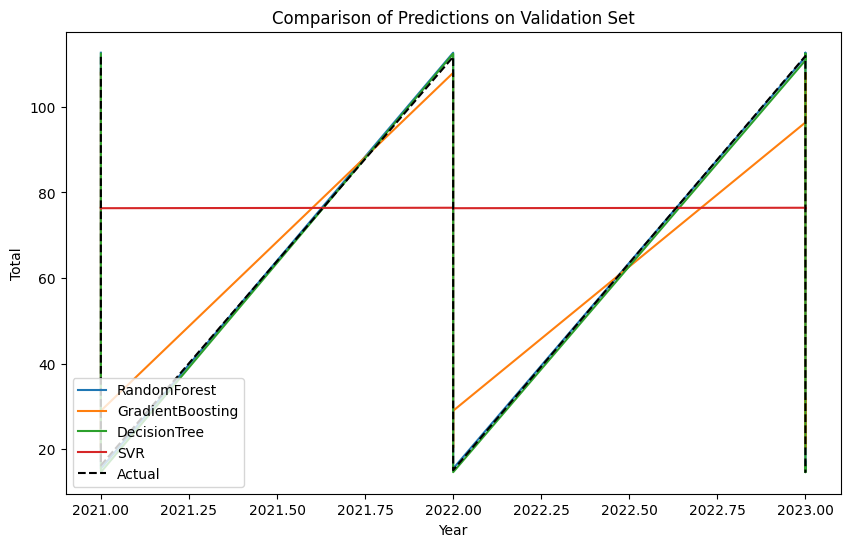

In [43]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()

In [44]:
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

Mean Squared Error Scores:
RandomForest: 8.69334630689763
GradientBoosting: 123.64488312583111
DecisionTree: 7.546909336020124
SVR: 682.7783839269673


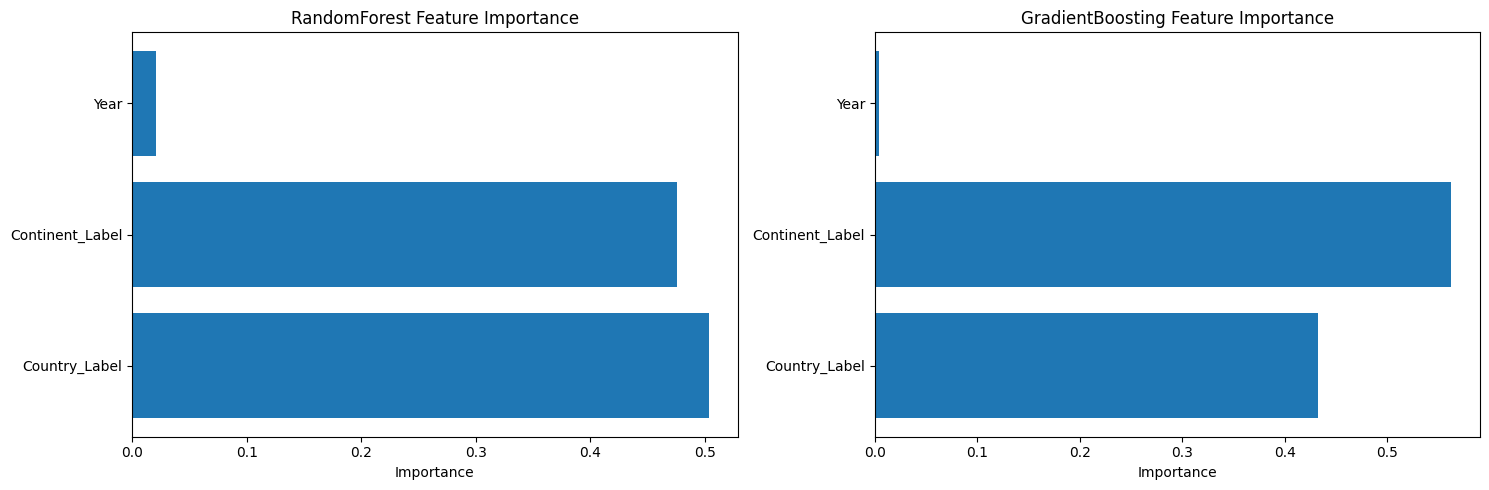

In [45]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()
ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 8.623077461459546
MSE for Decision Tree: 7.546909336020124
MSE for Ensemble: 7.896608790941898


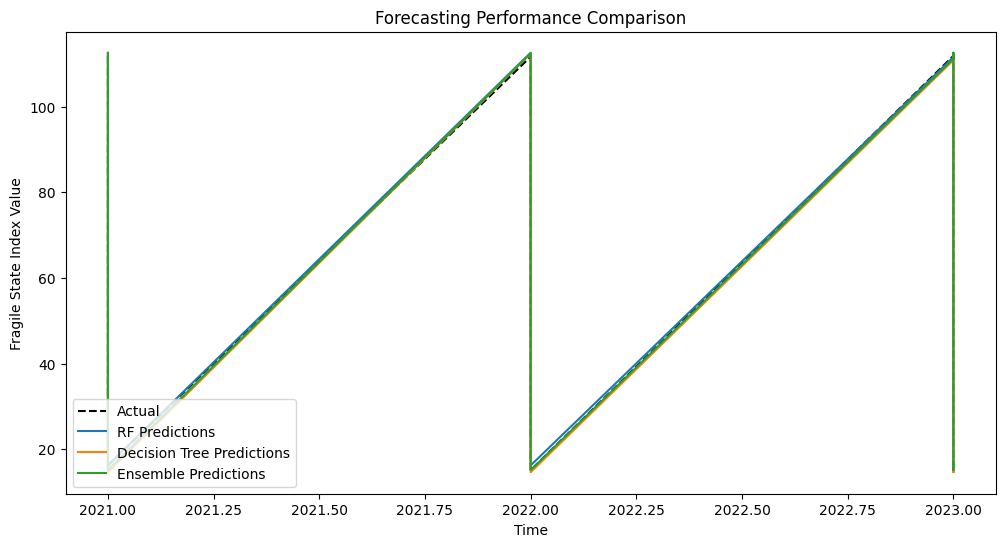

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [48]:
import pandas as pd
import plotly.express as px

future_years = range(2024, 2034) 
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'Total': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'Total']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="Total",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'Total': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [49]:
final = pd.DataFrame()
final['Country'] = combined_future['Country']
final['Year'] = combined_future['Year']
final['Continent'] = combined_future['Continent']
final['Total'] = combined_future['Total']

In [50]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,Total,Country,Continent
4,140,0,2006,108.900000,Zimbabwe,Afghanistan
144,140,0,2007,110.100000,Zimbabwe,Afghanistan
284,140,0,2008,112.500000,Zimbabwe,Afghanistan
424,140,0,2009,114.000000,Zimbabwe,Afghanistan
567,140,0,2010,110.200000,Zimbabwe,Afghanistan
710,140,0,2011,107.900000,Zimbabwe,Afghanistan
850,140,0,2012,106.300000,Zimbabwe,Afghanistan
995,140,0,2013,105.200000,Zimbabwe,Afghanistan
1137,140,0,2014,102.800000,Zimbabwe,Afghanistan
1283,140,0,2015,100.000000,Zimbabwe,Afghanistan


In [51]:
groups_of_columns = [['E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain'], ['P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights'], ['C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance'], ['S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]
for group in groups_of_columns:
    df[f'{group[0][0]}_avg'] = df[group].mean(axis=1)
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,...,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent,Continent_Label,Country_Label,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,...,9.7,9.8,NaN,Africa,0,119,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,...,9.5,10.0,NaN,Africa,0,29,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,...,7.6,10.0,NaN,Africa,0,31,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,...,8.3,10.0,NaN,Asia,1,61,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,...,8.9,8.0,NaN,Africa,0,140,9.333333,9.300000,8.800000,8.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,Denmark,2023,174th,17.9,1.1,1.4,3.1,1.0,1.8,1.0,...,3.0,0.6,NaN,Europe,2,35,1.266667,0.866667,1.866667,1.966667
2534,Switzerland,2023,175th,17.8,1.4,1.0,2.1,1.6,2.4,1.0,...,3.2,0.4,NaN,Europe,2,121,1.666667,0.766667,1.500000,2.000000
2535,New Zealand,2023,176th,16.7,1.6,1.4,2.0,2.6,2.6,1.6,...,1.2,0.5,NaN,Oceania,4,90,2.266667,0.700000,1.666667,0.933333
2536,Finland,2023,177th,16.0,2.0,1.4,0.3,2.7,1.6,1.5,...,1.9,1.0,NaN,Europe,2,44,1.933333,0.633333,1.233333,1.533333


PREDICTING E_AVG

In [52]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'E_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)
print(y_val)
predictions

2115    8.066667
2116    9.166667
2117    8.300000
2118    7.933333
2119    8.233333
          ...   
2533    1.266667
2534    1.666667
2535    2.266667
2536    1.933333
2537    1.166667
Name: E_avg, Length: 423, dtype: float64


{'RandomForest': array([8.16108653, 9.05977312, 7.76326678, 7.88407986, 8.44869416,
        8.62729041, 8.04033838, 7.86279165, 7.79166667, 6.58527225,
        7.467697  , 8.49195103, 7.53138605, 7.2943433 , 7.22458266,
        7.70429383, 6.35066667, 7.49636048, 6.42276766, 7.41260577,
        8.33445607, 6.23114735, 6.6930196 , 7.15289113, 7.93635082,
        6.98336264, 6.42768542, 6.56386528, 7.57354353, 7.03257845,
        6.58666667, 5.814     , 7.43369058, 7.12749955, 7.44522452,
        6.32339551, 6.16346148, 6.93626358, 8.0834521 , 5.903     ,
        6.21753968, 8.10681593, 7.73691806, 5.19666273, 5.89088275,
        7.47819528, 5.96111791, 6.3622925 , 7.22011666, 4.74775397,
        6.51723104, 6.59161717, 5.63508251, 6.79293015, 6.77245029,
        5.76819277, 5.37459547, 6.07660834, 5.54833142, 4.66443112,
        5.61499807, 6.71793458, 5.97628461, 4.56711263, 7.14155281,
        5.47233333, 7.17952812, 4.95066667, 5.49933333, 6.37624273,
        6.03254257, 5.53157661, 

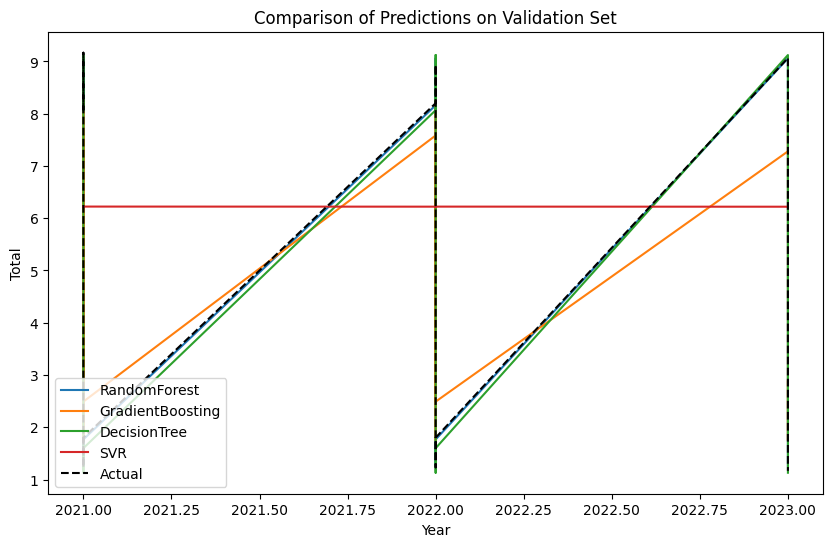

Mean Squared Error Scores:
RandomForest: 0.11673645182572095
GradientBoosting: 0.8141269881184184
DecisionTree: 0.10686070926827604
SVR: 4.2114433800064015


In [53]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

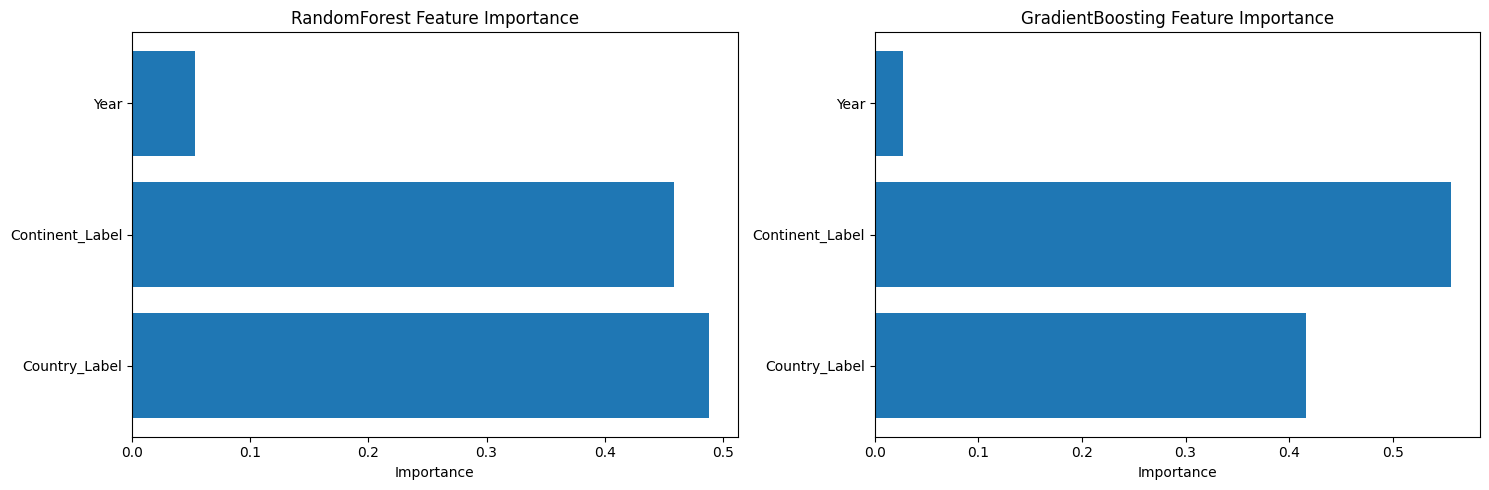

In [54]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.11776089183483614
MSE for Decision Tree: 0.10686070926827604
MSE for Ensemble: 0.1076160388994724


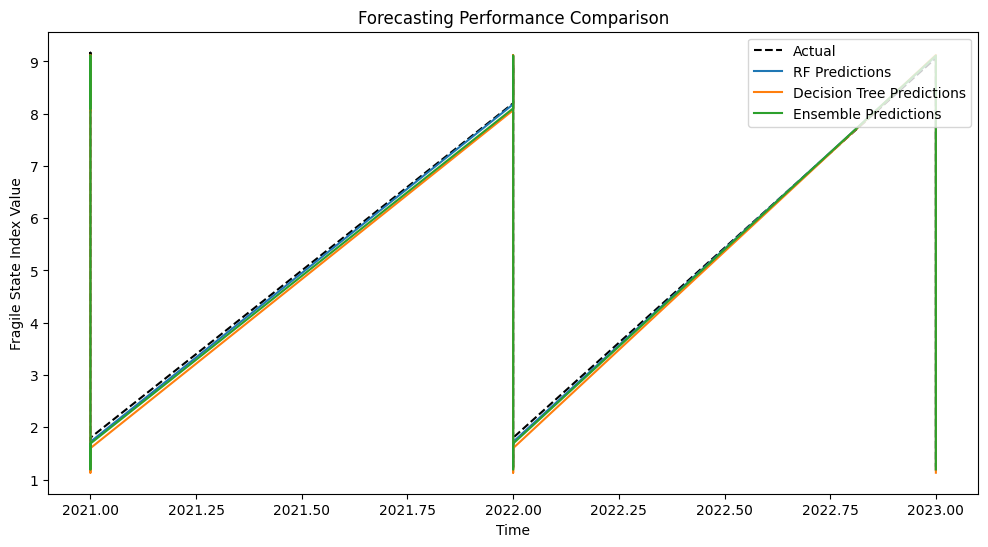

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [57]:
import pandas as pd
import plotly.express as px

future_years = range(2024, 2034) 
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'E_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'E_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="E_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'E_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [58]:
final['E_avg'] = combined_future['E_avg']

In [59]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,E_avg,Country,Continent
4,140,0,2006,9.333333,Zimbabwe,Afghanistan
144,140,0,2007,9.533333,Zimbabwe,Afghanistan
284,140,0,2008,9.866667,Zimbabwe,Afghanistan
424,140,0,2009,9.900000,Zimbabwe,Afghanistan
567,140,0,2010,9.566667,Zimbabwe,Afghanistan
710,140,0,2011,9.166667,Zimbabwe,Afghanistan
850,140,0,2012,8.933333,Zimbabwe,Afghanistan
995,140,0,2013,8.600000,Zimbabwe,Afghanistan
1137,140,0,2014,8.300000,Zimbabwe,Afghanistan
1283,140,0,2015,8.033333,Zimbabwe,Afghanistan


PREDICTING P_AVG

In [60]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'P_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)
print(y_val)
predictions

2115    9.800000
2116    9.233333
2117    9.766667
2118    9.400000
2119    9.433333
          ...   
2533    0.866667
2534    0.766667
2535    0.700000
2536    0.633333
2537    0.600000
Name: P_avg, Length: 423, dtype: float64


{'RandomForest': array([9.71390555, 9.02745134, 9.58963377, 9.45309722, 9.42014879,
        9.12181686, 9.00288307, 8.81318676, 8.72770841, 8.25317426,
        8.4361024 , 8.43138657, 8.66965833, 8.36386266, 8.68724186,
        8.58790563, 8.44006954, 7.65260774, 8.48206035, 7.74256656,
        7.25720478, 8.61866667, 7.76091048, 8.84869158, 8.19402843,
        7.50672641, 7.58730461, 9.23514659, 7.40534823, 7.46463007,
        7.98855817, 6.4367762 , 7.76201641, 6.78697807, 7.77091048,
        7.20756952, 7.54014932, 6.622298  , 7.48832499, 7.35411784,
        8.82684288, 6.62592612, 6.83021458, 6.818     , 6.61033333,
        7.36162426, 7.77473993, 6.44583333, 7.76129863, 6.67296866,
        6.77790735, 6.65407393, 5.99645265, 6.99270143, 7.21974195,
        5.86620986, 5.71345588, 7.4657702 , 6.79233333, 7.18053547,
        7.74202442, 6.447     , 6.53100078, 6.58486696, 5.52614906,
        4.92058107, 5.98071309, 5.72951156, 7.20241558, 5.15502257,
        5.87433389, 5.629     , 

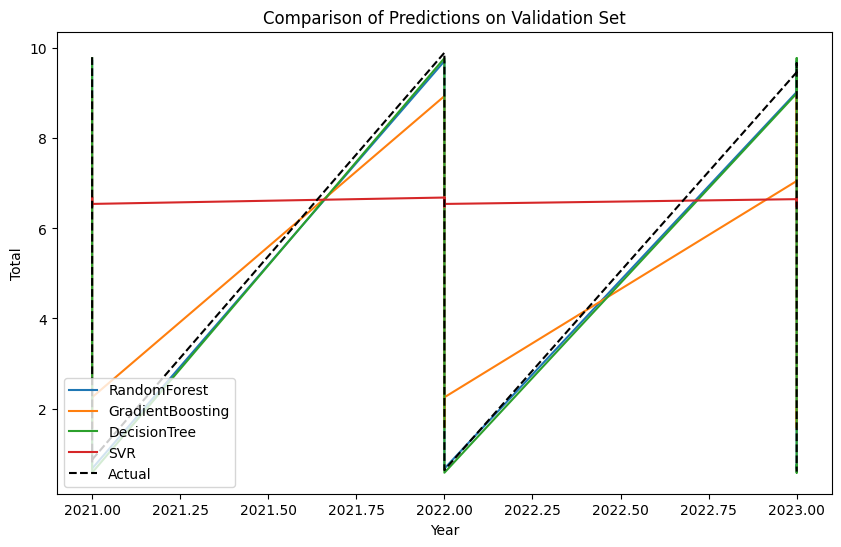

Mean Squared Error Scores:
RandomForest: 0.10932288425457616
GradientBoosting: 1.2136877495197573
DecisionTree: 0.10873003412992266
SVR: 6.9193618043540015


In [61]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

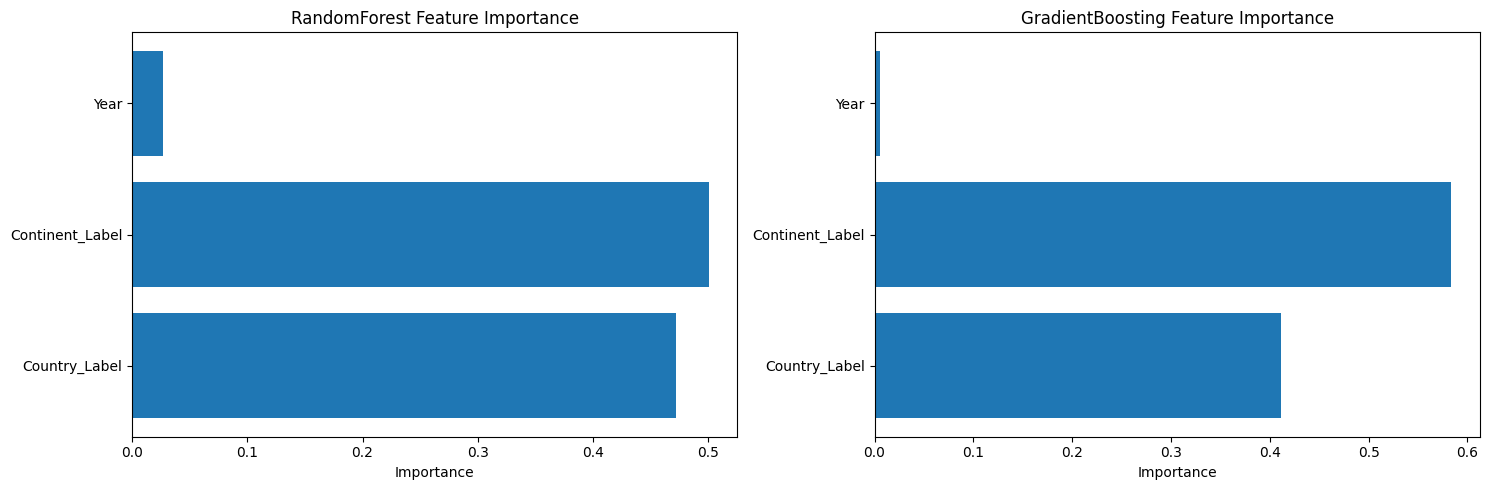

In [62]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.11084858184510088
MSE for Decision Tree: 0.10873003412992266
MSE for Ensemble: 0.10605036933573775


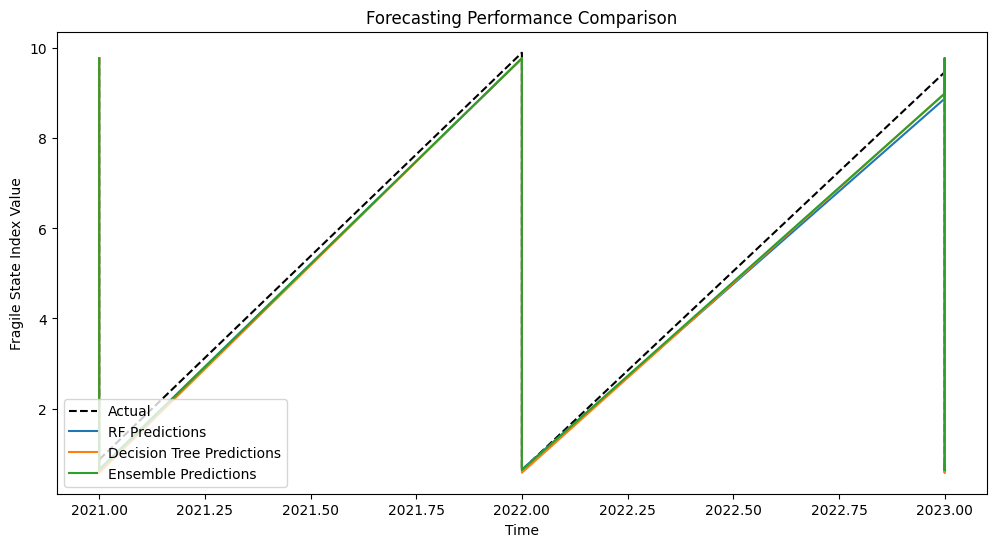

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [65]:
import pandas as pd
import plotly.express as px

future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'P_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'P_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])
fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="P_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'P_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [66]:
final['P_avg'] = combined_future['P_avg']

In [67]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,P_avg,Country,Continent
4,140,0,2006,9.300000,Zimbabwe,Afghanistan
144,140,0,2007,9.600000,Zimbabwe,Afghanistan
284,140,0,2008,9.633333,Zimbabwe,Afghanistan
424,140,0,2009,9.833333,Zimbabwe,Afghanistan
567,140,0,2010,9.500000,Zimbabwe,Afghanistan
710,140,0,2011,9.166667,Zimbabwe,Afghanistan
850,140,0,2012,9.133333,Zimbabwe,Afghanistan
995,140,0,2013,9.066667,Zimbabwe,Afghanistan
1137,140,0,2014,8.900000,Zimbabwe,Afghanistan
1283,140,0,2015,8.600000,Zimbabwe,Afghanistan


PREDICTING C_AVG

In [68]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'C_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)
print(y_val)
predictions

2115    9.600000
2116    9.200000
2117    9.733333
2118    9.166667
2119    8.600000
          ...   
2533    1.866667
2534    1.500000
2535    1.666667
2536    1.233333
2537    1.866667
Name: C_avg, Length: 423, dtype: float64


{'RandomForest': array([9.81211873, 9.48797013, 9.79584097, 9.22536397, 8.75846   ,
        8.98746   , 9.2268473 , 8.79980487, 8.388     , 8.48133333,
        9.285     , 7.45241333, 9.05773381, 8.67833333, 8.04966667,
        7.47451665, 8.89671399, 7.74866667, 8.87872725, 8.43696988,
        6.39221013, 8.88266667, 8.0639376 , 7.86472047, 7.48233333,
        8.011     , 8.90966667, 7.481     , 6.8360236 , 8.37971047,
        7.527     , 8.53755632, 7.29130694, 6.878     , 6.67575362,
        8.35333333, 8.559     , 7.96181701, 5.30066667, 8.76255781,
        6.97852098, 6.00390628, 6.09261896, 8.35366667, 8.12104372,
        6.53351589, 7.10238822, 8.447     , 5.60225   , 8.49110327,
        6.4418527 , 7.82244175, 7.273461  , 5.32206519, 6.29533333,
        7.54581985, 7.02143453, 6.62728537, 6.73433333, 6.54199116,
        7.07095752, 6.88766667, 7.1722508 , 8.197     , 6.05501778,
        7.00997677, 5.14566606, 7.57466667, 7.24866667, 5.7496554 ,
        6.81897719, 7.27027478, 

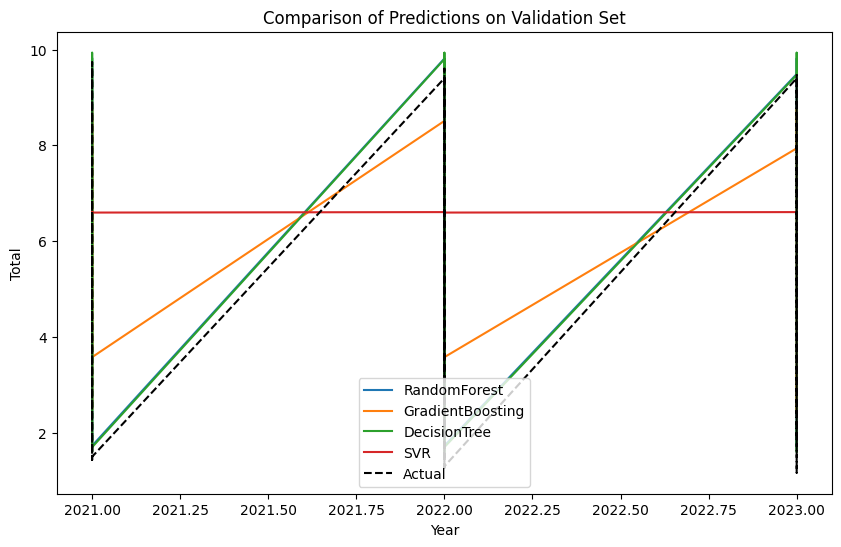

Mean Squared Error Scores:
RandomForest: 0.10282659334978606
GradientBoosting: 1.2574636609356484
DecisionTree: 0.08852086116963286
SVR: 5.0802259173327045


In [69]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

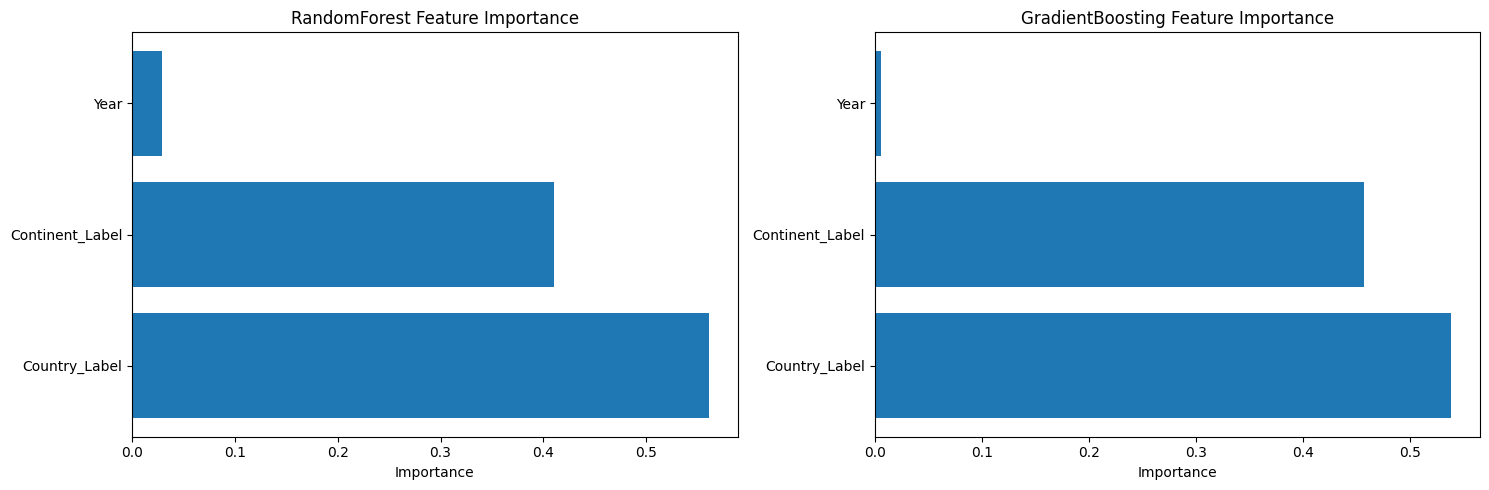

In [70]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.10545805505017002
MSE for Decision Tree: 0.08852086116963286
MSE for Ensemble: 0.09587247884364807


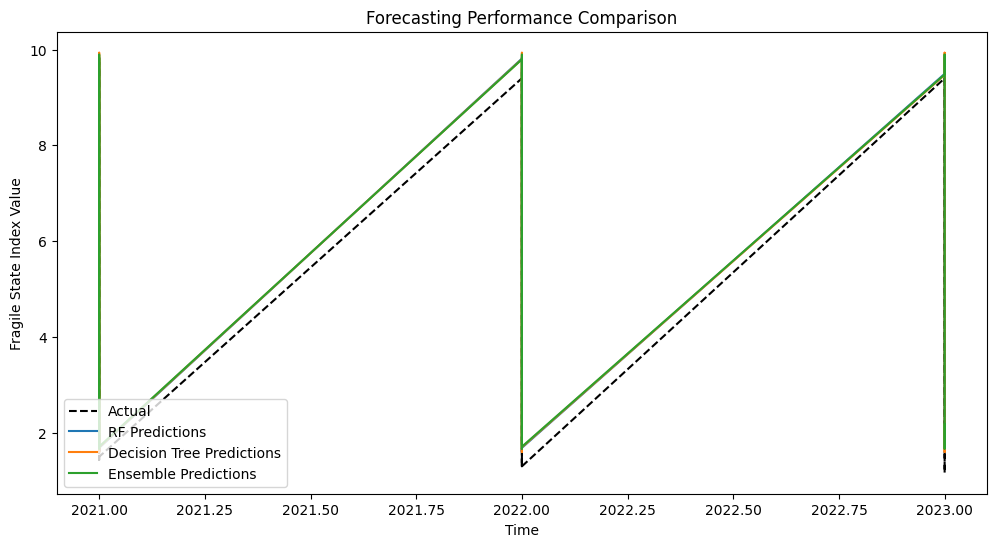

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [73]:
import pandas as pd
import plotly.express as px

future_years = range(2024, 2034)  
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)
future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'C_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'C_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])
fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="C_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'C_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [74]:
final['C_avg'] = combined_future['C_avg']

In [75]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,C_avg,Country,Continent
4,140,0,2006,8.800000,Zimbabwe,Afghanistan
144,140,0,2007,9.100000,Zimbabwe,Afghanistan
284,140,0,2008,9.433333,Zimbabwe,Afghanistan
424,140,0,2009,9.433333,Zimbabwe,Afghanistan
567,140,0,2010,9.166667,Zimbabwe,Afghanistan
710,140,0,2011,9.200000,Zimbabwe,Afghanistan
850,140,0,2012,9.066667,Zimbabwe,Afghanistan
995,140,0,2013,8.833333,Zimbabwe,Afghanistan
1137,140,0,2014,8.733333,Zimbabwe,Afghanistan
1283,140,0,2015,8.466667,Zimbabwe,Afghanistan


PREDICTING S_AVG

In [76]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'S_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)
print(y_val)
predictions

2115    9.766667
2116    9.366667
2117    9.100000
2118    9.633333
2119    9.400000
          ...   
2533    1.966667
2534    2.000000
2535    0.933333
2536    1.533333
2537    1.200000
Name: S_avg, Length: 423, dtype: float64


{'RandomForest': array([9.791     , 9.44548419, 9.04854474, 9.75213226, 9.3293586 ,
        8.92000505, 9.12025305, 9.14407203, 8.30379713, 8.57033333,
        7.39952258, 8.36233333, 7.44664244, 8.13657316, 8.74449079,
        7.72291036, 7.60983585, 8.65557893, 8.57366667, 8.29723424,
        8.04071232, 7.55366667, 8.5514795 , 6.068     , 7.53421914,
        7.86450752, 8.06897472, 6.87232069, 8.22665507, 7.77833741,
        7.82405526, 7.392     , 6.53254442, 7.58836483, 6.68718704,
        6.51556863, 6.70641228, 7.3734357 , 7.37899056, 5.58217432,
        5.65438973, 7.74738229, 7.53166667, 6.85266667, 7.36156699,
        6.00951033, 5.921     , 6.66727357, 6.8245969 , 5.99429132,
        6.03123399, 5.536     , 6.54663591, 7.13823236, 5.38778082,
        5.59508389, 6.97589714, 5.75433333, 4.93110269, 5.66626539,
        5.35089943, 4.87641891, 5.3392057 , 4.81474876, 6.58942666,
        6.085     , 6.06174675, 5.54512583, 4.64002229, 5.71233333,
        5.37237546, 4.22257525, 

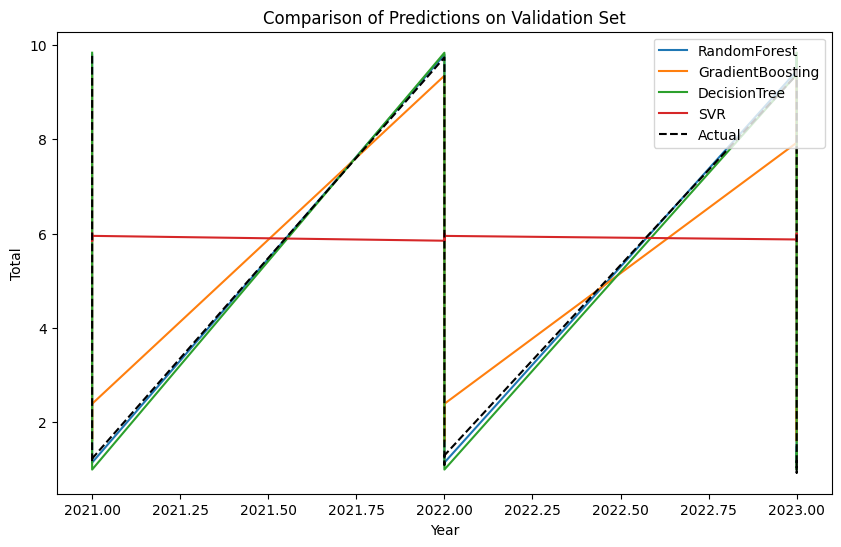

Mean Squared Error Scores:
RandomForest: 0.1933621862135224
GradientBoosting: 1.2652608699727166
DecisionTree: 0.1854202455160085
SVR: 4.987833792945897


In [77]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

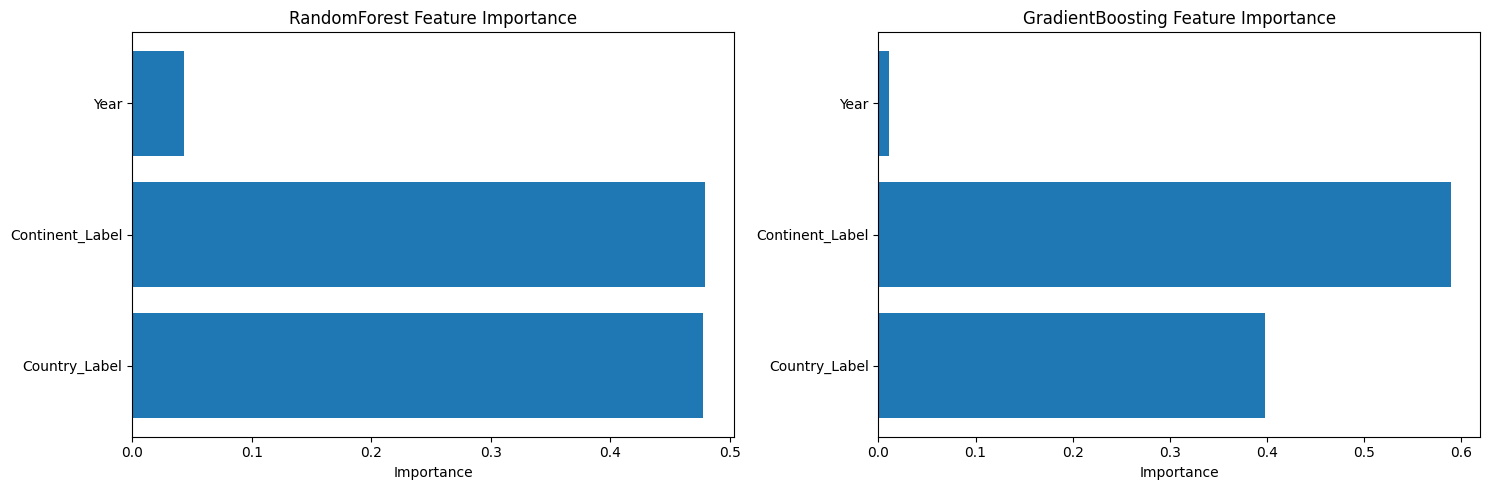

In [78]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')

axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.18637412150228075
MSE for Decision Tree: 0.1854202455160085
MSE for Ensemble: 0.18523848926262138


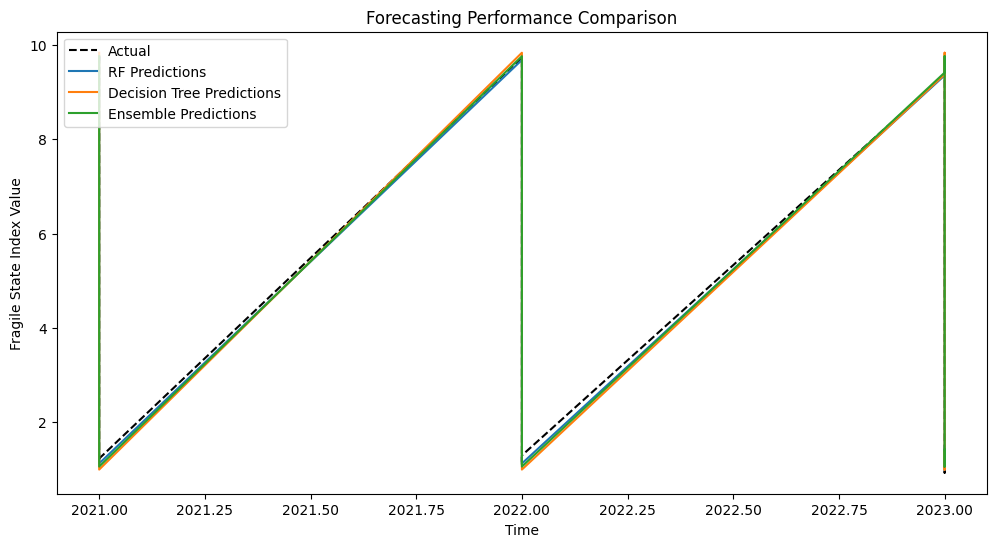

In [80]:
# Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [81]:
import pandas as pd
import plotly.express as px

future_years = range(2024, 2034) 
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]

y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'S_avg': y_pred_future
})

combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'S_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="S_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'S_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [82]:
final['S_avg'] = combined_future['S_avg']

In [83]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,S_avg,Country,Continent
4,140,0,2006,8.866667,Zimbabwe,Afghanistan
144,140,0,2007,8.466667,Zimbabwe,Afghanistan
284,140,0,2008,8.566667,Zimbabwe,Afghanistan
424,140,0,2009,8.833333,Zimbabwe,Afghanistan
567,140,0,2010,8.500000,Zimbabwe,Afghanistan
710,140,0,2011,8.433333,Zimbabwe,Afghanistan
850,140,0,2012,8.300000,Zimbabwe,Afghanistan
995,140,0,2013,8.566667,Zimbabwe,Afghanistan
1137,140,0,2014,8.333333,Zimbabwe,Afghanistan
1283,140,0,2015,8.233333,Zimbabwe,Afghanistan


In [84]:
combined_future

,Country_Label,Continent_Label,Year,S_avg,Country,Continent
0,119,0,2006,9.700000,Sudan,Afghanistan
1,29,0,2006,9.666667,Congo Democratic Republic,Afghanistan
2,31,0,2006,8.800000,Cote d'Ivoire,Afghanistan
3,61,1,2006,9.066667,Iraq,Albania
4,140,0,2006,8.866667,Zimbabwe,Afghanistan
...,...,...,...,...,...,...
3943,136,5,2033,6.200333,Venezuela,Armenia
3944,137,1,2033,4.667864,Vietnam,Albania
3945,138,1,2033,9.759439,Yemen,Albania
3946,139,0,2033,7.343496,Zambia,Afghanistan


In [85]:
final

,Country,Year,Continent,Total,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,Afghanistan,112.300000,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,Afghanistan,110.100000,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,Afghanistan,109.200000,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,Albania,109.000000,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,Afghanistan,108.900000,9.333333,9.300000,8.800000,8.866667
...,...,...,...,...,...,...,...,...
3943,Venezuela,2033,Armenia,90.283919,7.174661,8.856207,7.884990,6.200333
3944,Vietnam,2033,Albania,64.627413,4.588860,6.632489,5.559882,4.667864
3945,Yemen,2033,Albania,112.488830,8.101903,9.776647,9.794358,9.759439
3946,Zambia,2033,Afghanistan,84.846367,8.065073,7.535339,5.266667,7.343496


In [86]:
final = final[final['Year'] <= 2024]
final

,Country,Year,Continent,Total,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,Afghanistan,112.300000,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,Afghanistan,110.100000,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,Afghanistan,109.200000,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,Albania,109.000000,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,Afghanistan,108.900000,9.333333,9.300000,8.800000,8.866667
...,...,...,...,...,...,...,...,...
2674,Venezuela,2024,Armenia,90.283919,7.174661,8.856207,7.884990,6.200333
2675,Vietnam,2024,Albania,64.627413,4.588860,6.632489,5.559882,4.667864
2676,Yemen,2024,Albania,112.488830,8.101903,9.776647,9.794358,9.759439
2677,Zambia,2024,Afghanistan,84.846367,8.065073,7.535339,5.266667,7.343496


In [87]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output

df = final
app = dash.Dash(__name__)
app.layout = html.Div([
    html.Label('Select Country:'),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value=df['Country'].unique()[0]
    ),
    dcc.Graph(id='line-plot'),
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_line_plot(selected_country):
    selected_df = df[df['Country'] == selected_country]

    fig = make_subplots(rows=5, cols=1, subplot_titles=('Total', 'E_avg', 'P_avg', 'C_avg', 'S_avg'))

    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['Total'], mode='lines+markers'), row=1, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['E_avg'], mode='lines+markers'), row=2, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['P_avg'], mode='lines+markers'), row=3, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['C_avg'], mode='lines+markers'), row=4, col=1)

    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['S_avg'], mode='lines+markers'), row=5, col=1)
    fig.update_layout(height=600, title=f'Data for {selected_country}', showlegend=False)

    fig.update_xaxes(title_text='Year', row=5, col=1, tickmode='array', tickvals=selected_df['Year'], ticktext=selected_df['Year'].astype(str))

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)
